In [2]:
import numpy as np # linear algebra
import pandas as pd 
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical


In [4]:
os.listdir('E:/archive/brain_tumor_dataset')


['no', 'yes']

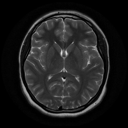

In [8]:
im =Image.open('E:/archive/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

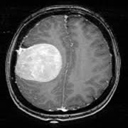

In [10]:
im =Image.open('E:/archive/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [12]:
yes=os.listdir('E:/archive/brain_tumor_dataset/yes')
no=os.listdir('E:/archive/brain_tumor_dataset/no')

In [14]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [16]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)


True

In [18]:
len(data_target)==len(data)

True

In [20]:
data_target


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
data

array(['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg',
       'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg',
       'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG',
       'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG',
       'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG',
       'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg',
       'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG',
       'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG',
       'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg',
       'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg',
       'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg',
       'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG',
       'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg',
       'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG',
       'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG',
  

In [24]:
yes_values=os.listdir('E:/archive/brain_tumor_dataset/yes')
no_values=os.listdir('E:/archive/brain_tumor_dataset/no')

In [26]:
X_data =[]
for file in yes_values:
    #face = misc.imread('E:/archive/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('E:/archive/brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [28]:
#X_data =[]
for file in no_values:
    #face = misc.imread('E:/archive/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('E:/archive/brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [30]:
len(X_data)==len(data)==len(data_target)

True

In [32]:
X = np.squeeze(X_data)

In [34]:
X.shape


(253, 32, 32, 3)

In [36]:
# normalize data
X = X.astype('float32')
X /= 255

In [38]:
#categorical_labels = to_categorical(data_target, num_classes=2)

In [40]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [46]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 16)          │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 16)          │          20,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 36)            │          46,692 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 36)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 36)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         295,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,285 (1.40 MB)

 Trainable params: 367,285 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [50]:
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - acc: 0.5920 - loss: 0.5879 - val_acc: 0.0000e+00 - val_loss: 1.6286
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - acc: 0.8199 - loss: 0.5005 - val_acc: 0.0000e+00 - val_loss: 0.9058
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - acc: 0.8095 - loss: 0.5112 - val_acc: 0.0000e+00 - val_loss: 0.9039
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - acc: 0.8147 - loss: 0.4928 - val_acc: 0.0000e+00 - val_loss: 1.1816
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - acc: 0.8173 - loss: 0.4548 - val_acc: 0.0000e+00 - val_loss: 1.4295
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - acc: 0.8069 - loss: 0.4793 - val_acc: 0.0000e+00 - val_loss: 1.1988
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc: 0.8017 - loss: 0.4598 - val_acc: 0.0000e+00 - val_loss: 1.0421
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - acc: 0.8121 - loss: 0.4560 - val_acc: 0.0000e+00 - val_loss: 1.0559
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

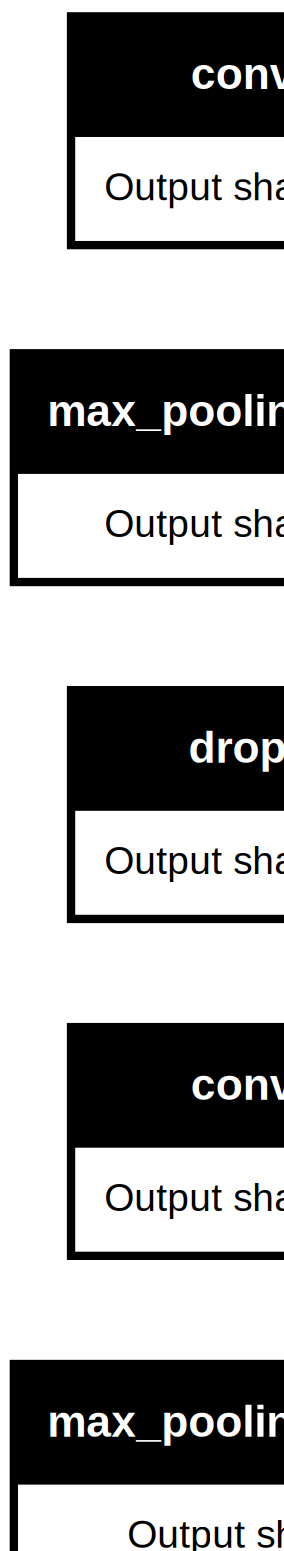

In [58]:
from IPython.display import SVG
from keras.utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [60]:
!pip install ipython

In [62]:
!pip install pydot

In [64]:
!pip install --upgrade keras

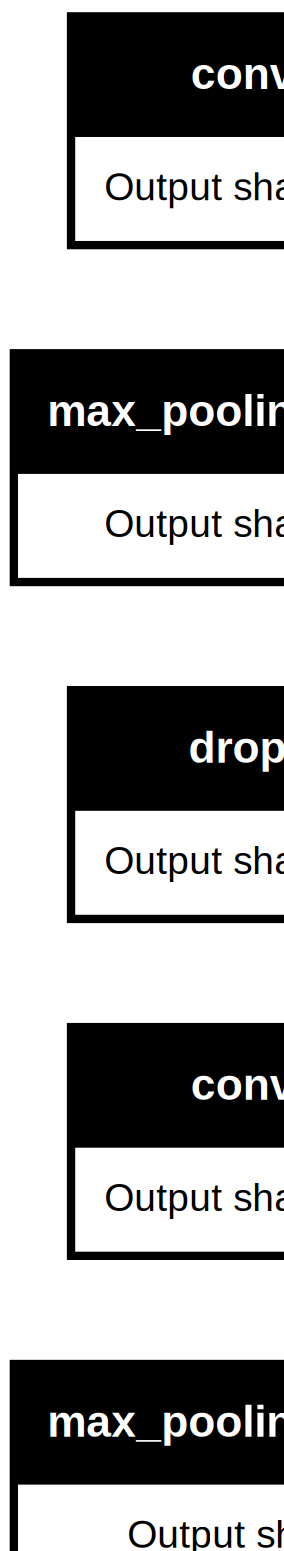

In [68]:
from IPython.display import SVG
from keras.utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [70]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7142857313156128


In [72]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


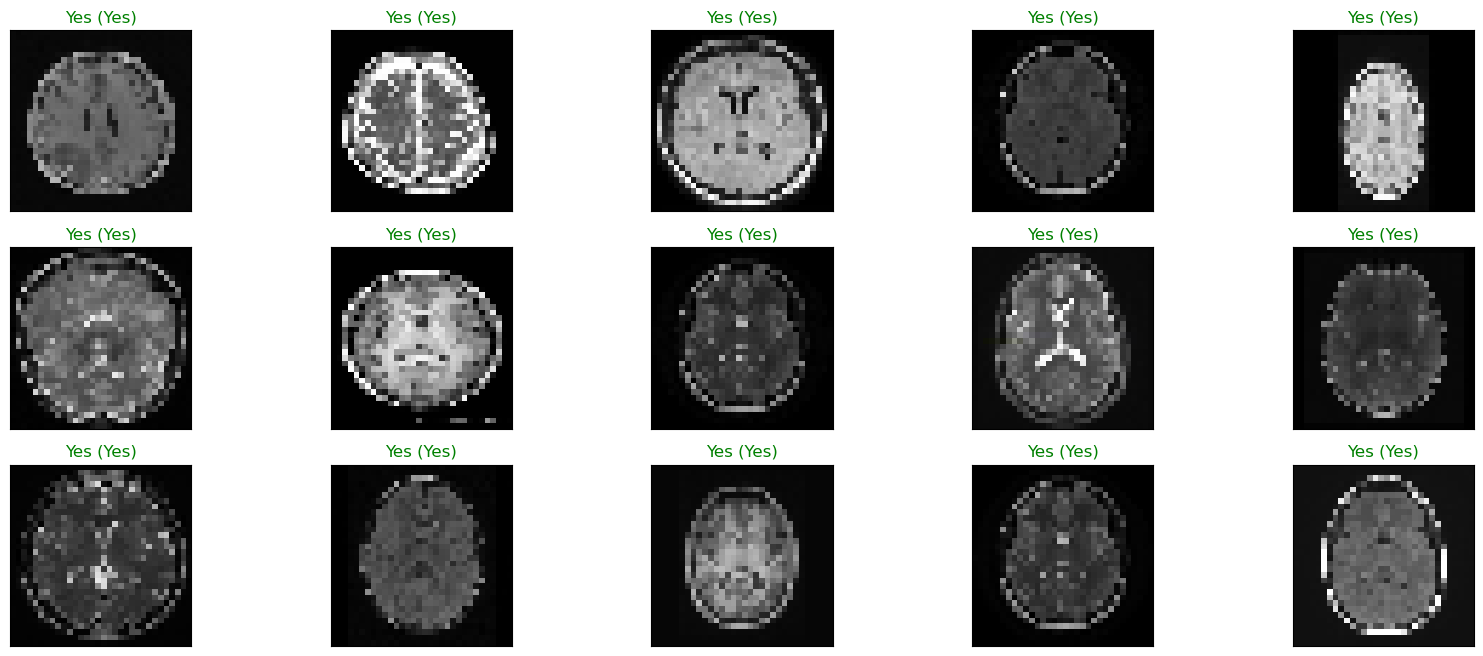

In [74]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [84]:
from keras.models import load_model

# Assuming 'model' is your trained model
# Save the model to H5 file
model.save('braintumor_final_draft.h5')